In [2]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
    1.0,2.0,3.0,4.0
    5.0,6.0,,8.0
    10.0,11.0,12,'''

df = pd.read_csv(StringIO(csv_data))

df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [3]:
# Count the number of missing values in each row

df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
# See array values

df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

In [5]:
#ELIMINATING SAMPLES OR FEATURES WITH MISSING VALUES

# Drop records that have any missing values

df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
# Drop columns that have any missing values

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [7]:
# Only drop rows where all columns are missing

df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
# Drop rows that do not have at least 4 non-missing values

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
# Only drop rows where missing values appear in specific column

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [10]:
#IMPUTING MISSING VALUES

from sklearn.preprocessing import Imputer

# Imputes using the column mean
# Can set axis=1 to use row mean
# Strategy can be set to median or most_frequent

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)

imputed_data = imr.transform(df.values)

imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

In [11]:
#HANDLING CATEGORICAL DATA

df = pd. DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']

df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [12]:
#MAPPING ORDINAL FEATURES
# Now you can get the different sizes with numbers!1

size_mapping = {
                'XL': 3,
                'L': 2,
                'M': 1,}

df['size'] = df['size'].map(size_mapping)

#If we want to transform the integer values back to the original string
#representation at a later stage, we can simply define a reverse-mapping
#dictionary 

#inv_size_mapping = {v: k for k, v in size_mapping.items()}

df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [13]:
#Encoding class labels
#Makes them integer values which most learning libraries need
#Most do this automatically, but this is something important to know

import numpy as np
class_mapping = {label:idx for idx,label in
                enumerate(np.unique(df['classlabel']))}

class_mapping

{'class1': 0, 'class2': 1}

In [14]:
#Turn mapping dictionary of class labels into integers

df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [15]:
#Reverse key value pairs in mapping dictionary

inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [16]:
#use LabelEncoder to do the same thing using sklearn

from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)

y

array([0, 1, 0], dtype=int64)

In [17]:
#use inverse_transform to reverse LbaelEncoder

class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [18]:
#PERFORMING ONE-HOT ENCODING ON NOMINAL FEATURES
#If the colors are different numbers, it keeps them from having different weights

X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()

X[:, 0] = color_le.fit_transform(X[:, 0])

X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [19]:
#Turns the colors blue green and red into binary indicators

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [20]:
#You hot code using get_dummies in pandas
#Pretty damn handy

pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [21]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [22]:
#PARTITIONING A DATASET IN TRAINING AND TEST SETS

df_wine = pd.read_csv('C:\\Users\\M0185RK\\Desktop\\Python\\DataSets\\ml\\wine.csv', header=None)

df_wine.columns = ['Class label', 'Alcohol',
                  'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
                  'Color intensity', 'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline']
print('Class labels', np.unique(df_wine['Class label']))

df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
from sklearn.cross_validation import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
#SCALING FEATURES
#Normalizing Data

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

X_train_norm

array([[ 0.72043011,  0.20378151,  0.53763441, ...,  0.48717949,
         1.        ,  0.5854251 ],
       [ 0.31989247,  0.08403361,  0.31182796, ...,  0.27350427,
         0.64102564,  0.        ],
       [ 0.60215054,  0.71218487,  0.48387097, ...,  0.04273504,
         0.10622711,  0.42348178],
       ..., 
       [ 0.37365591,  0.1512605 ,  0.44623656, ...,  0.44444444,
         0.61904762,  0.02672065],
       [ 0.77150538,  0.16596639,  0.40860215, ...,  0.31623932,
         0.75457875,  0.54493927],
       [ 0.84139785,  0.34033613,  0.60215054, ...,  0.06837607,
         0.16117216,  0.28178138]])

In [25]:
#Standardizing Data

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

X_train_std

array([[ 0.91083058, -0.46259897, -0.01142613, ...,  0.65706596,
         1.94354495,  0.93700997],
       [-0.95609928, -0.96608672, -1.53725357, ..., -0.40859506,
         0.58118003, -1.41336684],
       [ 0.35952243,  1.67501572, -0.37471838, ..., -1.55950896,
        -1.44846566,  0.28683658],
       ..., 
       [-0.70550467, -0.68342693, -0.62902295, ...,  0.44393375,
         0.49776993, -1.30608823],
       [ 1.14889546, -0.6215951 , -0.88332752, ..., -0.19546286,
         1.0121322 ,  0.77446662],
       [ 1.47466845,  0.11155374,  0.42452457, ..., -1.43162964,
        -1.23994042, -0.28206514]])

In [26]:
#SELECTING MEANINGFUL FEATURES
# L1 l1 not 11 for penalty

from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))

print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.983870967742
Test accuracy: 0.981481481481


In [28]:
#Since we the fit the LogisticRegression object on a multiclass dataset, it uses the
#One-vs-Rest (OvR) approach by default where the first intercept belongs to the
#model that fits class 1 versus class 2 and 3; the second value is the intercept of the
#model that fits class 2 versus class 1 and 3; and the third value is the intercept of the
#model that fits class 3 versus class 1 and 2, respectively:

lr.intercept_

array([-0.38382057, -0.15806747, -0.70035085])

In [29]:
#each row consists of 13 weights
#where each weight is multiplied by the respective feature in the 13-dimensional
#Wine dataset to calculate the net input.

lr.coef_

array([[ 0.27992499,  0.        ,  0.        , -0.02823464,  0.        ,
         0.        ,  0.70987353,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23645479],
       [-0.64404246, -0.06872841, -0.0571999 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92663998,
         0.06024235,  0.        , -0.3710322 ],
       [ 0.        ,  0.06140641,  0.        ,  0.        ,  0.        ,
         0.        , -0.63712227,  0.        ,  0.        ,  0.49862754,
        -0.35787329, -0.57039176,  0.        ]])

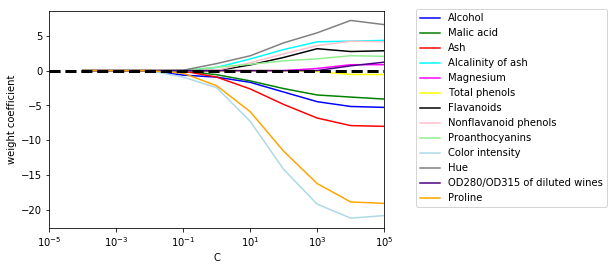

In [30]:
#to use negative powers you need
#for c in np.arange(-4, 6).astype(float):
# the astype(float) to change the thing that's broken
#https://stackoverflow.com/questions/43287311/why-cant-i-raise-to-a-negative-power-in-numpy


import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
         'magenta', 'yellow', 'black',
         'pink', 'lightgreen', 'lightblue',
         'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6).astype(float):
    lr = LogisticRegression(penalty='l1',
                            C=10**c,
                            random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
            label=df_wine.columns[column+1],
            color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()


In [31]:
#FROM SCRATCH SBS ALGORITHM

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)
            
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train,
                          X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
    


In [32]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

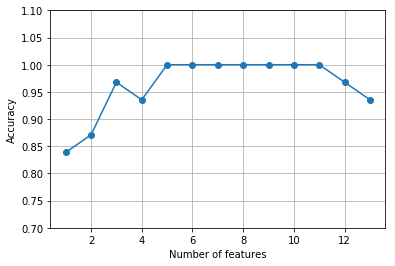

In [33]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [34]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [35]:
#Using all features shows a higher accuracy for training than test
#shows overfitting


knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.983870967742
Test accuracy: 0.944444444444


In [37]:
#let's only use the 5 features from above
#Almost a two percent difference
#reduce dimensionality while retaining the ability to explain the variance

knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', 
      knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:',
     knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.959677419355
Test accuracy: 0.962962962963


In [46]:
#ASSESSING FEATURE IMPORTANCE WITH RANDOM FORESTS
#makes 10,000 trees and ranks the importance of the features

from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


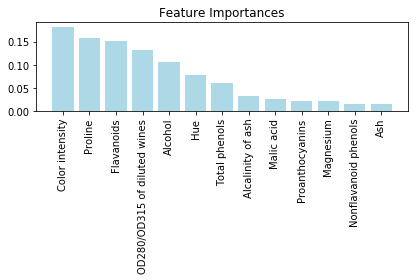

In [47]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        color='lightblue',
        align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [52]:
X_selected = forest.transform(X_train, threshold=0.15)
X_selected.shape

AttributeError: 'RandomForestClassifier' object has no attribute 'transform'